In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import shapefile as shp
import seaborn as sns

In [39]:
# Avocado Price Analysis

In [6]:
# Import the data from avocado.csv

avocado_df=pd.read_csv('avocado.csv')

In [7]:
# Look at the first few rows to see what columns are available
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
# look at the descriptive statistics of avocado prices
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
# check out what time frame is available
avocado_df["year"].unique()

array([2015, 2016, 2017, 2018])

In [10]:
# rename columns to something more meaningful 
avocado_df=avocado_df.rename(columns={'4046':"Small", "4225":"Large","4770":"XLarge"})

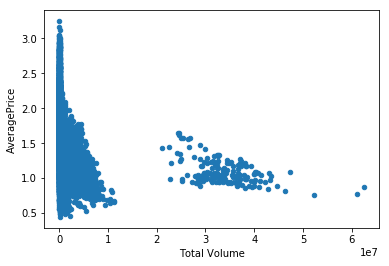

In [40]:
# plot average price over time vs. volume to see if there is a correlation
avocado_df.plot(kind="scatter", x="Total Volume", y="AveragePrice")

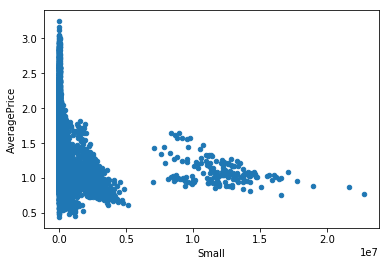

In [12]:
# look at the scatter plot of just small avocados
avocado_df.plot(kind="scatter", x="Small", y="AveragePrice")

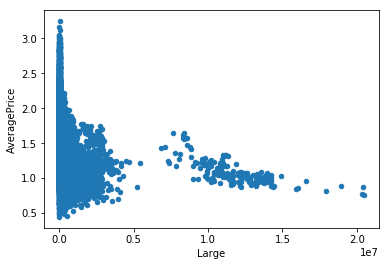

In [13]:
# look at the scatter plot of just the large avocados
avocado_df.plot(kind="scatter", x="Large", y="AveragePrice")

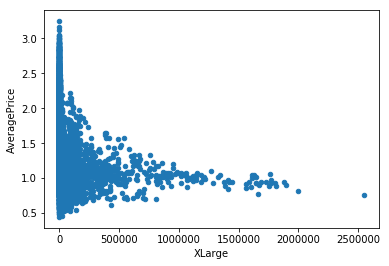

In [14]:
# look at the plot of extra large avocados
avocado_df.plot(kind="scatter", x="XLarge", y="AveragePrice")

In [15]:
avocado_df["Date"].describe()

count          18249
unique           169
top       2017-09-10
freq             108
Name: Date, dtype: object

In [16]:
avocado_df["Date"].min()

'2015-01-04'

In [17]:
avocado_df["Date"].max()

'2018-03-25'

In [18]:
# see what regions the data is available for
avocado_df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
AvocGrpDate=avocado_df.groupby(["Date"])

In [20]:
AvocSumByDate=AvocGrpDate.sum()

In [21]:
AvocSumByDate.head()

,Unnamed: 0,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,,
2015-01-04,5507,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,217620
2015-01-11,5399,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,217620
2015-01-18,5291,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,217620
2015-01-25,5183,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,217620
2015-02-01,5075,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,217620


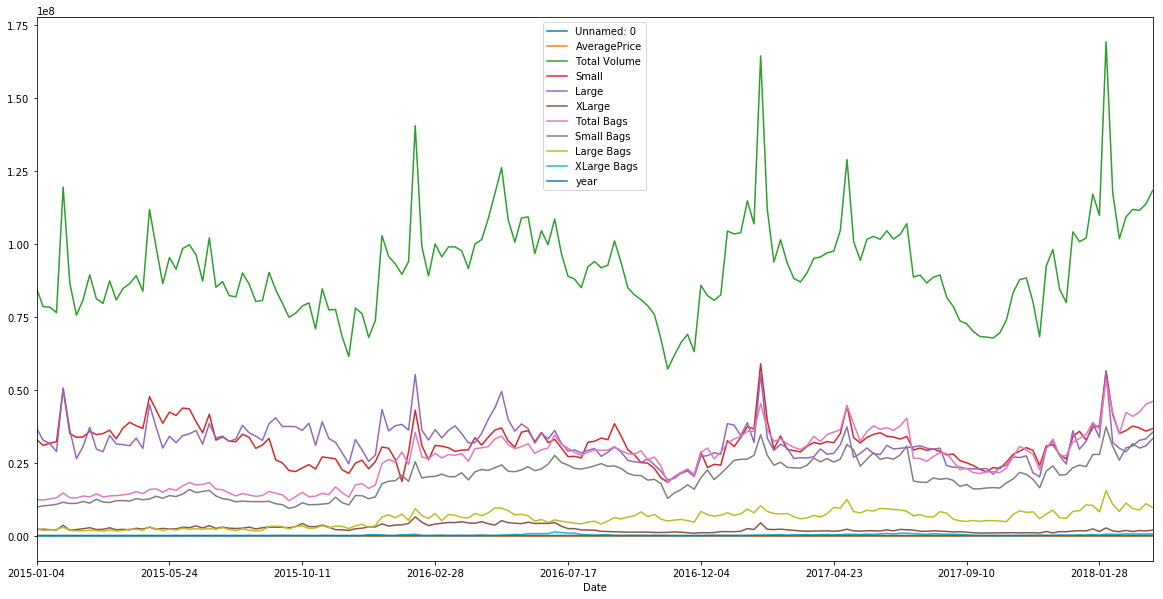

In [22]:
# look at trends over time of volume and price
AvocSumByDate.plot(kind="line",figsize=(20,10))

In [30]:
# group by region and date to look at trends over time for specific regions
AvocGrpRgn=avocado_df.groupby(["region", "Date"])

In [31]:
# turn the mean prices by region into a data frame 
meanprice=pd.DataFrame(AvocGrpRgn["AveragePrice"].mean().reset_index())

In [32]:
# pivot the data so that region is in the columns
PivotAvocadoMeans=meanprice.pivot(index='Date', columns='region', values='AveragePrice')


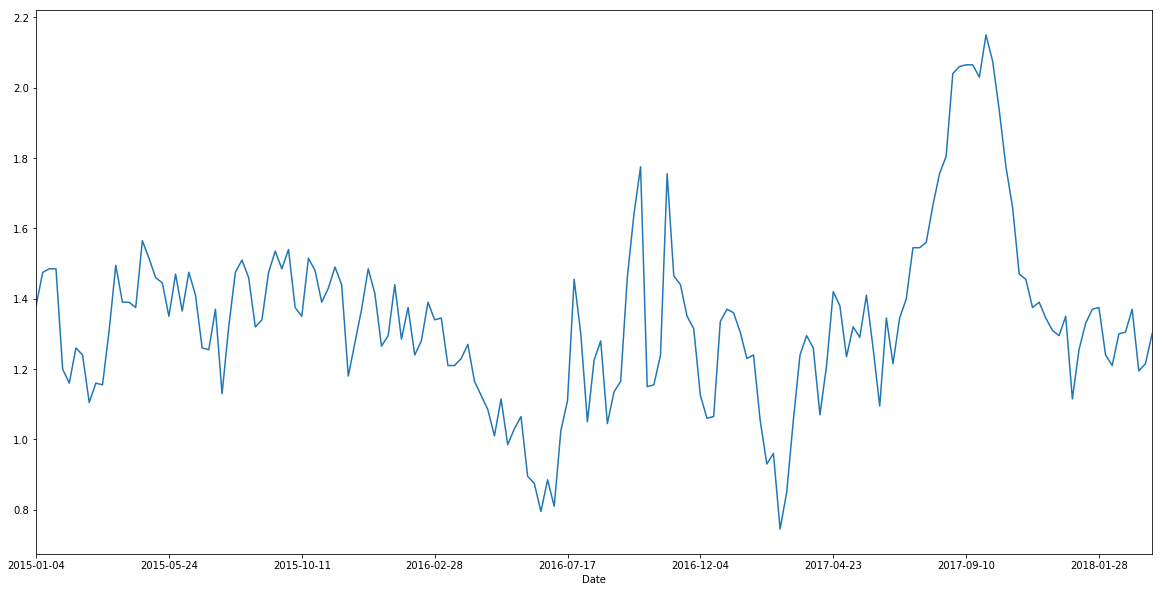

In [34]:
# look at the trends specifically for Atlanta
PivotAvocadoMeans["Atlanta"].plot(kind="line", figsize=(20,10))

In [35]:
PivotAvocadoMeans["Atlanta"].describe()

count    169.000000
mean       1.337959
std        0.248715
min        0.745000
25%        1.210000
50%        1.330000
75%        1.455000
max        2.150000
Name: Atlanta, dtype: float64

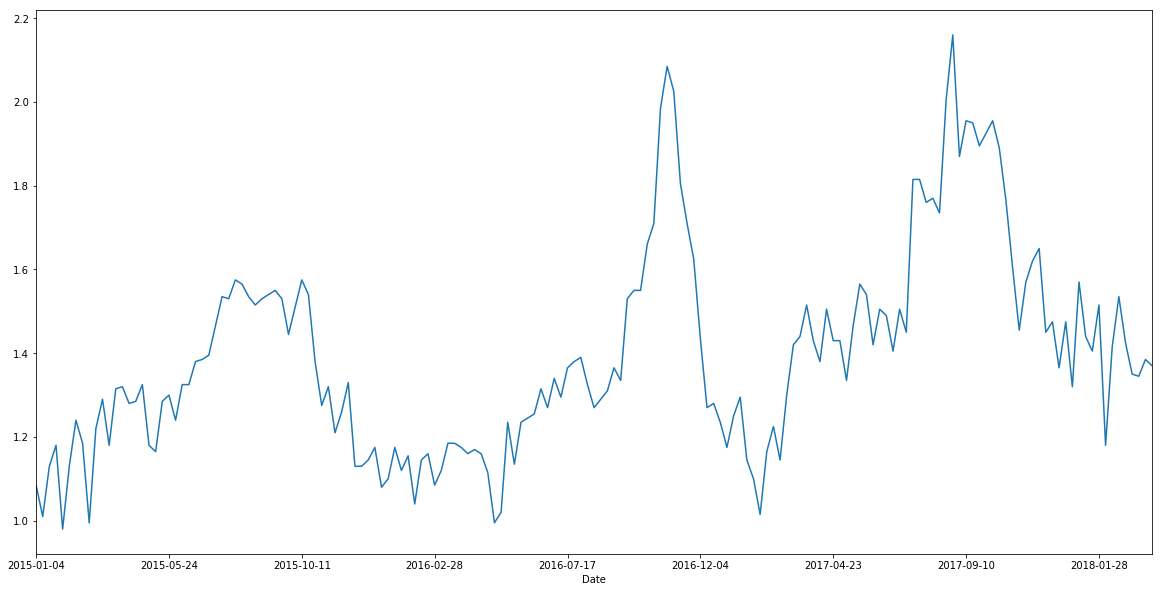

In [41]:
PivotAvocadoMeans["California"].plot(kind="line", figsize=(20,10))

In [44]:
PivotAvocadoMeans["California"].describe()

count    169.000000
mean       1.395325
std        0.244347
min        0.980000
25%        1.210000
50%        1.365000
75%        1.530000
max        2.160000
Name: California, dtype: float64

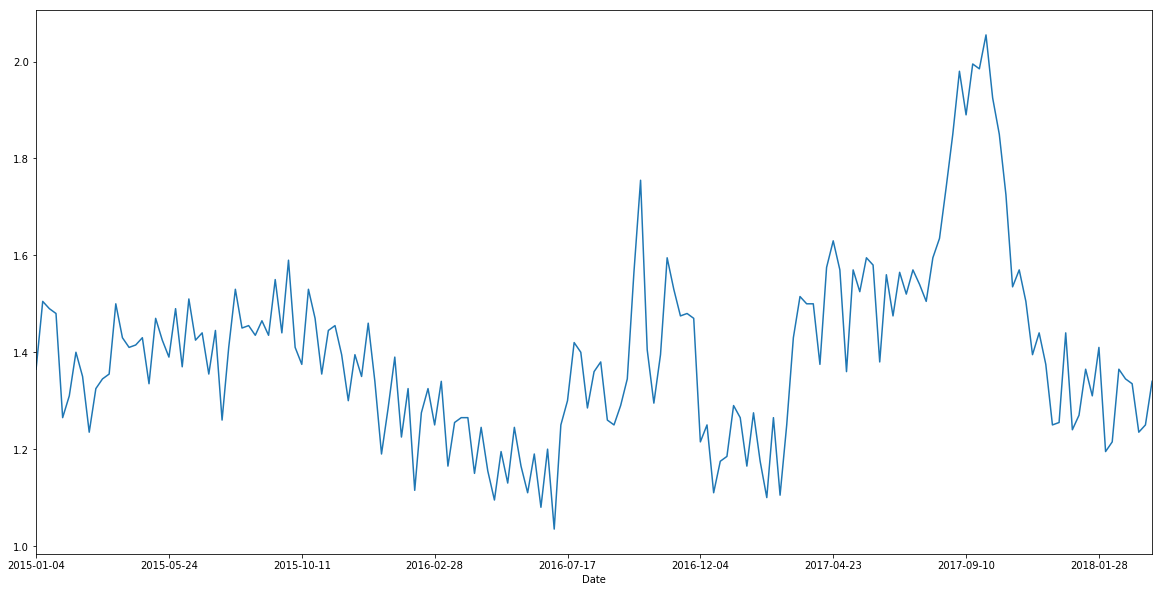

In [45]:
PivotAvocadoMeans["Southeast"].plot(kind="line", figsize=(20,10))

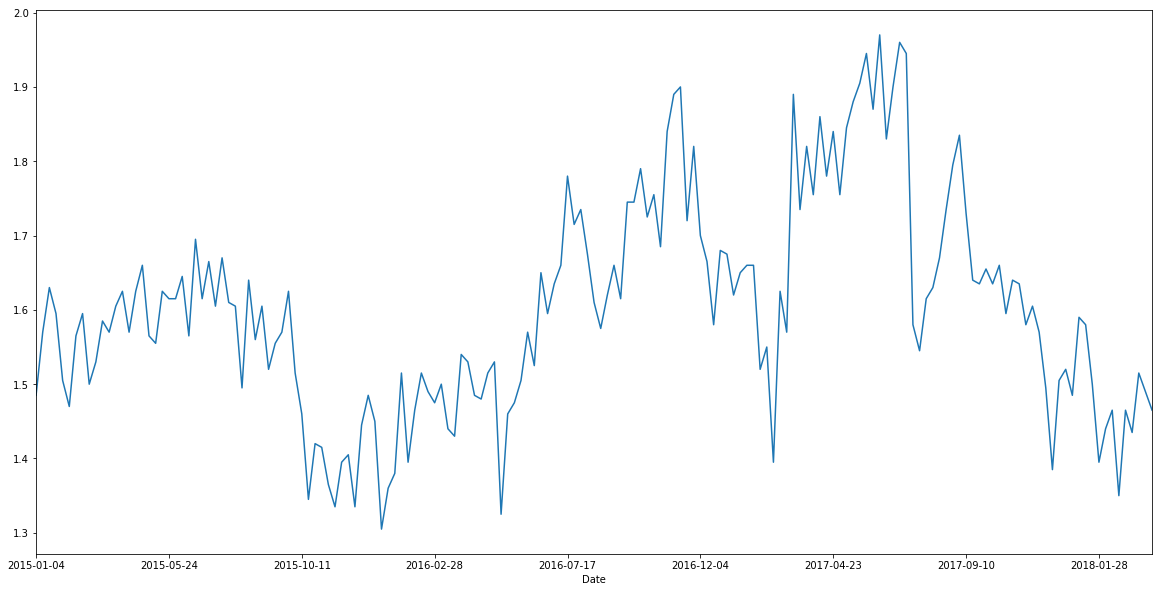

In [46]:
PivotAvocadoMeans["Northeast"].plot(kind="line", figsize=(20,10))

In [47]:
PivotAvocadoMeans["Northeast"].describe()

count    169.000000
mean       1.601923
std        0.144777
min        1.305000
25%        1.500000
50%        1.595000
75%        1.670000
max        1.970000
Name: Northeast, dtype: float64

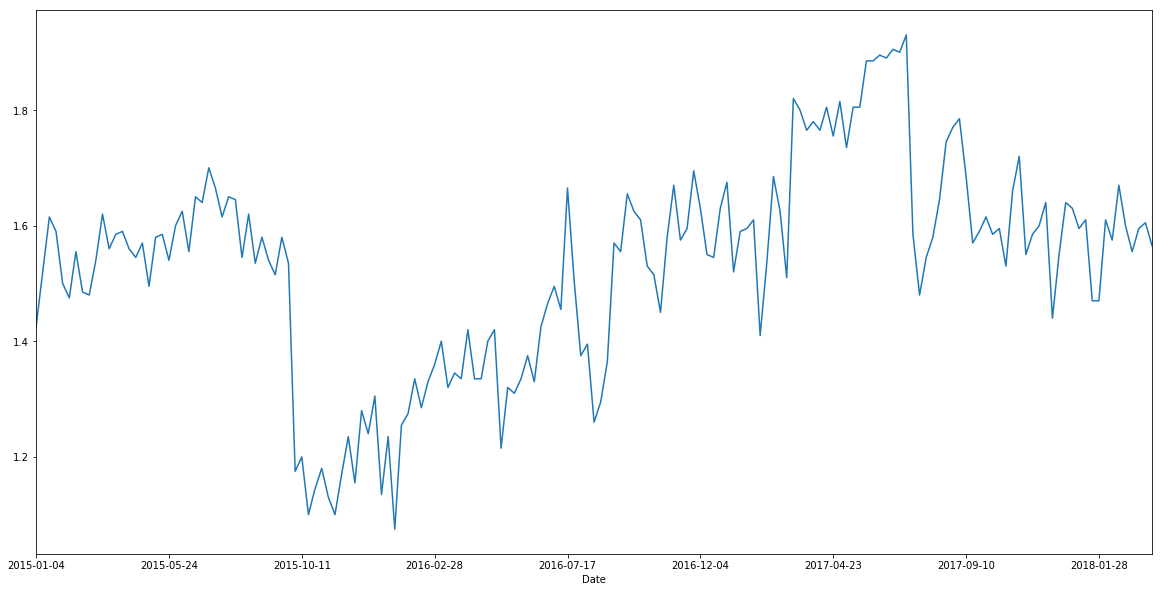

In [48]:
PivotAvocadoMeans["Boston"].plot(kind="line", figsize=(20,10))

In [49]:
PivotAvocadoMeans["Boston"].describe()

count    169.000000
mean       1.530888
std        0.182675
min        1.075000
25%        1.420000
50%        1.560000
75%        1.630000
max        1.930000
Name: Boston, dtype: float64

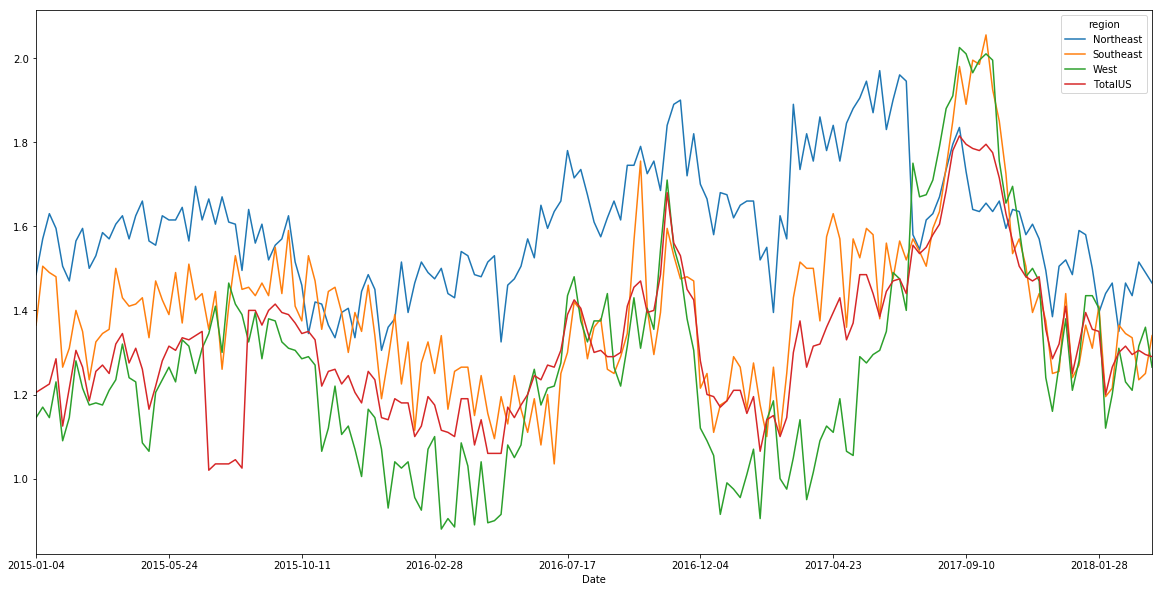

In [53]:
PivotAvocadoMeans[["Northeast","Southeast","West","TotalUS"]].plot(kind="line", figsize=(20,10))